Fitness Data of Club in Canada using polynomial linear regression.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

df = pd.read_csv('fitness_class_2212.csv')

x = df.iloc[:,1:2].values
y = df.iloc[:,2].values
x


array([[17],
       [10],
       [16],
       ...,
       [ 9],
       [34],
       [20]])

In [15]:
y

array([79.56, 79.01, 74.53, ..., 87.38, 68.64, 94.39])

In [17]:
from sklearn.linear_model import LinearRegression
y = np.nan_to_num(y, nan=np.nanmean(y))
lin_reg=LinearRegression()
lin_reg.fit(x,y)


LinearRegression()

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)


LinearRegression()

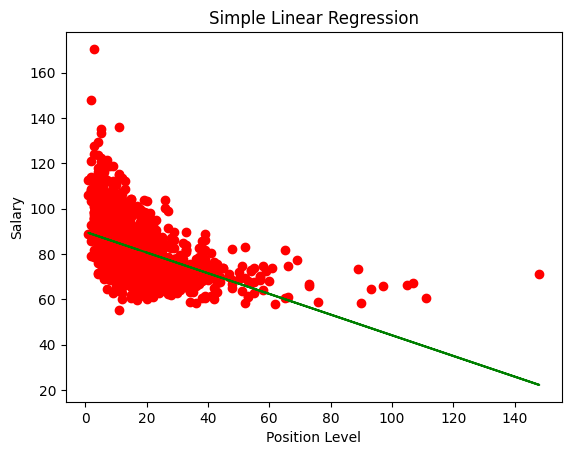

In [19]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='green')
plt.title('Simple Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


Trained Model using KNN where Elastic Net Regression is used.

In [22]:
# Importing libraries

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Elastic Net Regression

class ElasticRegression() :

	def __init__( self, learning_rate, iterations, l1_penality, l2_penality ) :

		self.learning_rate = learning_rate

		self.iterations = iterations

		self.l1_penality = l1_penality

		self.l2_penality = l2_penality

	# Function for model training

	def fit( self, x, y ) :

		# no_of_training_examples, no_of_features

		self.m, self.n = x.shape

		# weight initialization

		self.W = np.zeros( self.n )

		self.b = 0

		self.x = x
		self.y = y
		# gradient descent learning

		for i in range( self.iterations ) :

			self.update_weights()

		return self

	# Helper function to update weights in gradient descent

	def update_weights( self ) :

		y_pred = self.predict( self.x )

		# calculate gradients

		dW = np.zeros( self.n )

		for j in range( self.n ) :

			if self.W[j] > 0 :

				dW[j] = ( - ( 2 * ( self.x[:,j] ).dot( self.y - y_pred ) ) +

						self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m

			else :

				dW[j] = ( - ( 2 * ( self.x[:,j] ).dot( self.y - y_pred ) )

						- self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m


		db = - 2 * np.sum( self.y - y_pred ) / self.m

		# update weights

		self.W = self.W - self.learning_rate * dW

		self.b = self.b - self.learning_rate * db

		return self

	# Hypothetical function h( x )

	def predict( self, x ) :
		# Ensure x is a NumPy array for dot product
		x = np.array(x)
		return x.dot( self.W ) + self.b

# Driver Code

def main() :

	# Importing dataset

	df = pd.read_csv( "fitness_class_2212.csv" )

	x = df.iloc[:,:-1].values

	y = df.iloc[:,1].values

	# Splitting dataset into train and test set

	X_train, X_test, Y_train, Y_test = train_test_split( x, y,

											test_size = 1/3, random_state = 0 )

	# Model training

	model = ElasticRegression( iterations = 1000,

					learning_rate = 0.01, l1_penality = 500, l2_penality = 1 )

	model

Predicted values  [nan nan nan]
Real values       [122.36  81.25  94.39]
Trained W         nan
Trained b         nan


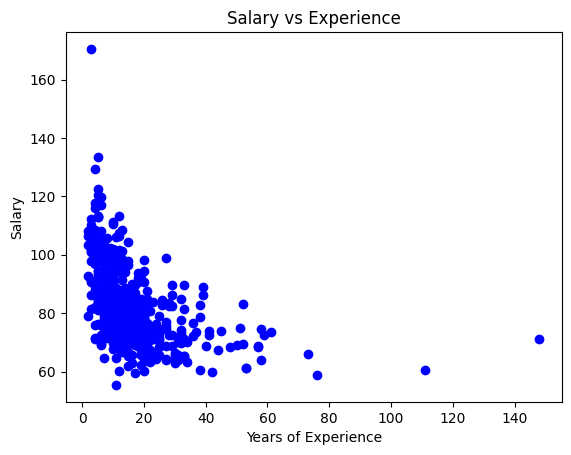

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=1/3, random_state=0)
model = ElasticRegression(iterations=1000, learning_rate=0.01, l1_penality=500, l2_penality=1)
model.fit(X_train, Y_train)
Y_pred = model.predict( X_test )
print( "Predicted values ", np.round( Y_pred[:3], 2 ) )
print( "Real values      ", Y_test[:3] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )
plt.scatter( X_test, Y_test, color = 'blue' )
plt.plot( X_test, Y_pred, color = 'orange' )
plt.title( 'Salary vs Experience' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )
plt.show()


if __name__ == "__main__" :

    main()